In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from prettytable import PrettyTable

In [2]:
# read file into dataframe
df = pd.read_csv("nba_players.csv")

In [3]:
# check datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1294 non-null   int64  
 1   name         1294 non-null   object 
 2   gp           1294 non-null   int64  
 3   min          1294 non-null   float64
 4   pts          1294 non-null   float64
 5   fgm          1294 non-null   float64
 6   fga          1294 non-null   float64
 7   fg           1294 non-null   float64
 8   3p_made      1294 non-null   float64
 9   3pa          1294 non-null   float64
 10  3p           1294 non-null   float64
 11  ftm          1294 non-null   float64
 12  fta          1294 non-null   float64
 13  ft           1294 non-null   float64
 14  oreb         1294 non-null   float64
 15  dreb         1294 non-null   float64
 16  reb          1294 non-null   float64
 17  ast          1294 non-null   float64
 18  stl          1294 non-null   float64
 19  blk   

In [4]:
df.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [5]:
# drop unnamed column and name, no value
df = df.iloc[:,2:]

In [6]:
# drop any duplicate values
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1290,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1291,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1292,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [8]:
# EDA
df.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,60.510819,17.651546,6.813215,2.633462,5.895286,44.190649,0.250386,0.784312,19.277280,1.297527,1.821020,70.366229,1.009969,2.029289,3.038176,1.546677,0.618083,0.370247,1.191422,0.628284
std,17.377643,8.290340,4.342739,1.676686,3.581643,6.120681,0.387123,1.070150,16.143449,0.983912,1.319591,10.550762,0.771787,1.353704,2.044194,1.472023,0.410493,0.432232,0.721558,0.483450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.925000,3.700000,1.400000,3.300000,40.225000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.100000,0.100000,0.300000,22.450000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.575000,47.875000,0.400000,1.200000,32.700000,1.675000,2.300000,77.575000,1.400000,2.600000,3.975000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [9]:
# view table version of correlation
df.corr()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
gp,1.000000,0.594794,0.538463,0.542876,0.518391,0.288593,0.113112,0.105723,0.042209,0.479909,0.477706,0.186374,0.408397,0.468233,0.464564,0.372209,0.454540,0.277974,0.520072,0.423529
min,0.594794,1.000000,0.912209,0.903060,0.910943,0.198275,0.396100,0.411117,0.173669,0.790435,0.779196,0.240310,0.566846,0.741131,0.705416,0.632842,0.755601,0.395635,0.826605,0.338246
pts,0.538463,0.912209,1.000000,0.990717,0.979930,0.249875,0.351271,0.362137,0.159066,0.895465,0.880654,0.256333,0.570758,0.690180,0.673569,0.556652,0.675379,0.383213,0.851881,0.335644
fgm,0.542876,0.903060,0.990717,1.000000,0.979939,0.287187,0.292837,0.303456,0.125900,0.846878,0.840414,0.219524,0.593628,0.700090,0.688777,0.536095,0.662598,0.395255,0.836117,0.337464
fga,0.518391,0.910943,0.979930,0.979939,1.000000,0.124747,0.393803,0.417734,0.203436,0.826785,0.806789,0.267461,0.500214,0.637392,0.611807,0.594812,0.690808,0.318744,0.847781,0.310213
fg,0.288593,0.198275,0.249875,0.287187,0.124747,1.000000,-0.291105,-0.347569,-0.329349,0.238154,0.292532,-0.172320,0.508897,0.403630,0.460296,-0.112382,0.053828,0.390943,0.118978,0.239726
3p_made,0.113112,0.396100,0.351271,0.292837,0.393803,-0.291105,1.000000,0.982748,0.588327,0.161688,0.098179,0.325582,-0.222563,0.018020,-0.072759,0.384322,0.311141,-0.159554,0.258708,0.033620
3pa,0.105723,0.411117,0.362137,0.303456,0.417734,-0.347569,0.982748,1.000000,0.581152,0.178340,0.112856,0.334774,-0.234574,0.014363,-0.079742,0.418906,0.344677,-0.172157,0.284915,0.015179
3p,0.042209,0.173669,0.159066,0.125900,0.203436,-0.329349,0.588327,0.581152,1.000000,0.041597,-0.021746,0.342509,-0.290546,-0.122802,-0.191618,0.271178,0.202746,-0.247666,0.112388,-0.006097
ftm,0.479909,0.790435,0.895465,0.846878,0.826785,0.238154,0.161688,0.178340,0.041597,1.000000,0.980548,0.254505,0.579185,0.649115,0.649715,0.479151,0.598469,0.402765,0.805916,0.318043


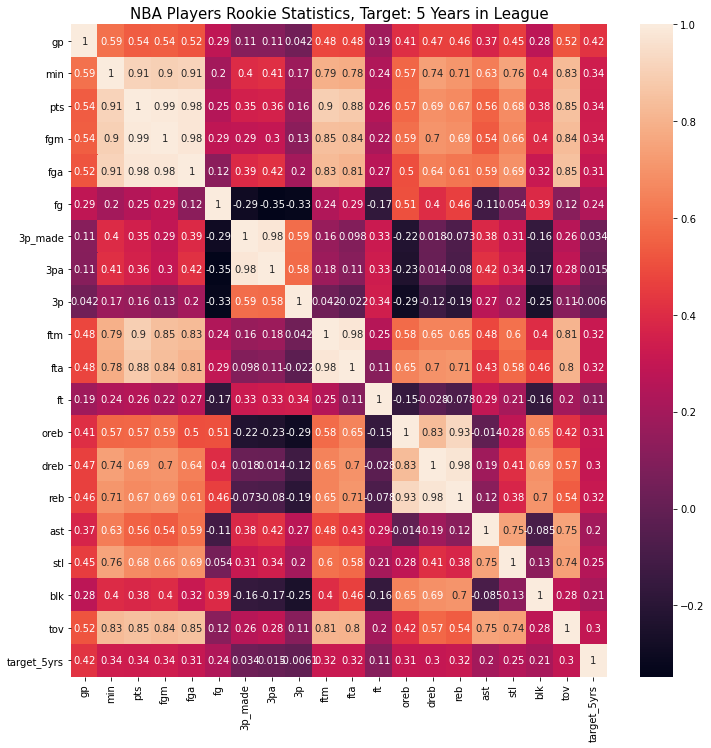

In [10]:
# plot correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.title('NBA Players Rookie Statistics, Target: 5 Years in League', fontsize=15)
plt.show()

In [11]:
# create X & Y variables
X = df.iloc[:,:-1].values
Y = df[["target_5yrs"]].values

In [12]:
# create scaler object
scaler = StandardScaler()

In [13]:
# scale X
X = scaler.fit_transform(X)

In [14]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.80,
                                                    random_state=46)

In [15]:
# create logistic regression classifier
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, Y_train.ravel())
Y_pred = log_reg_classifier.predict(X_test)

In [16]:
# training score
training_score = log_reg_classifier.score(X_train, Y_train)
print("The 1st Logistic Regression Training Score:",
"%.4f" % training_score)

The 1st Logistic Regression Training Score: 0.7442


In [17]:
# get accuracy
LR1_accuracy = accuracy_score(Y_test, Y_pred)
print('The 1st Logistic Regression Accuracy:', 
"%.4f" % LR1_accuracy)

The 1st Logistic Regression Accuracy: 0.7220


In [18]:
# create confusion matrix to check metrics
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("My confusion matrix:\n",conf_matrix)

My confusion matrix:
 [[225 156]
 [132 523]]


In [19]:
# assign variables updated
LR1_TP = conf_matrix[1][1]
LR1_FN = conf_matrix[0][1]
LR1_TN = conf_matrix[0][0]
LR1_FP = conf_matrix[1][0]

# get true pos/neg values
LR1_TPR = round(LR1_TP/(LR1_TP + LR1_FN),4)
LR1_TNR = round(LR1_TN/(LR1_TN + LR1_FP),4)

In [20]:
# print RMSE value
LR1_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', 
"%.4f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.5272


In [21]:
# print feature importances
feature_imp = log_reg_classifier.coef_[0]
# summarize feature importance
print("Logistic Regression Feature Importances:\n")
for i,j in enumerate(feature_imp):
    print('Feature: %0d, Score: %.5f' % (i+1,j))

Logistic Regression Feature Importances:

Feature: 1, Score: 0.44573
Feature: 2, Score: 0.07960
Feature: 3, Score: 0.33323
Feature: 4, Score: 0.26148
Feature: 5, Score: -0.28454
Feature: 6, Score: 0.22245
Feature: 7, Score: 0.25759
Feature: 8, Score: -0.40759
Feature: 9, Score: 0.07724
Feature: 10, Score: 0.12591
Feature: 11, Score: 0.14154
Feature: 12, Score: 0.14632
Feature: 13, Score: 0.10623
Feature: 14, Score: -0.14156
Feature: 15, Score: 0.18092
Feature: 16, Score: 0.34118
Feature: 17, Score: -0.19094
Feature: 18, Score: 0.25443
Feature: 19, Score: 0.14893


In [22]:
# try logistic regression again, this time removing features
df2 = df.copy()

In [23]:
"""dropping these columns because they are either a percentage and
rebounds is the sum of the oreb and dreb values""" 
df2 = df2.drop(columns=["fg","reb","ft","3p"]).reset_index(drop=True)

In [24]:
# check new correlation values
df2.corr()

,gp,min,pts,fgm,fga,3p_made,3pa,ftm,fta,oreb,dreb,ast,stl,blk,tov,target_5yrs
gp,1.000000,0.594794,0.538463,0.542876,0.518391,0.113112,0.105723,0.479909,0.477706,0.408397,0.468233,0.372209,0.454540,0.277974,0.520072,0.423529
min,0.594794,1.000000,0.912209,0.903060,0.910943,0.396100,0.411117,0.790435,0.779196,0.566846,0.741131,0.632842,0.755601,0.395635,0.826605,0.338246
pts,0.538463,0.912209,1.000000,0.990717,0.979930,0.351271,0.362137,0.895465,0.880654,0.570758,0.690180,0.556652,0.675379,0.383213,0.851881,0.335644
fgm,0.542876,0.903060,0.990717,1.000000,0.979939,0.292837,0.303456,0.846878,0.840414,0.593628,0.700090,0.536095,0.662598,0.395255,0.836117,0.337464
fga,0.518391,0.910943,0.979930,0.979939,1.000000,0.393803,0.417734,0.826785,0.806789,0.500214,0.637392,0.594812,0.690808,0.318744,0.847781,0.310213
3p_made,0.113112,0.396100,0.351271,0.292837,0.393803,1.000000,0.982748,0.161688,0.098179,-0.222563,0.018020,0.384322,0.311141,-0.159554,0.258708,0.033620
3pa,0.105723,0.411117,0.362137,0.303456,0.417734,0.982748,1.000000,0.178340,0.112856,-0.234574,0.014363,0.418906,0.344677,-0.172157,0.284915,0.015179
ftm,0.479909,0.790435,0.895465,0.846878,0.826785,0.161688,0.178340,1.000000,0.980548,0.579185,0.649115,0.479151,0.598469,0.402765,0.805916,0.318043
fta,0.477706,0.779196,0.880654,0.840414,0.806789,0.098179,0.112856,0.980548,1.000000,0.650151,0.697134,0.432065,0.578683,0.463803,0.800339,0.317272
oreb,0.408397,0.566846,0.570758,0.593628,0.500214,-0.222563,-0.234574,0.579185,0.650151,1.000000,0.834016,-0.013841,0.284364,0.649622,0.420815,0.307176


In [25]:
# create X & Y variables
X = df2.iloc[:,:-1].values
Y = df2[["target_5yrs"]].values

In [26]:
# create scaler object
scaler = StandardScaler()

In [27]:
# scale X
X = scaler.fit_transform(X)

In [28]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.80,
                                                    random_state=46)

In [29]:
# create logistic regression classifier
log_reg_classifier = LogisticRegression(penalty = 'l2', C = 1, 
    solver='newton-cg' ,random_state=46)
log_reg_classifier.fit(X_train, Y_train.ravel())
Y_pred = log_reg_classifier.predict(X_test)

In [30]:
# training score
training_score = log_reg_classifier.score(X_train, Y_train)
print("The 2nd Logistic Regression Training Score:",
"%.4f" % training_score)

The 2nd Logistic Regression Training Score: 0.7326


In [31]:
# get accuracy
LR2_accuracy = accuracy_score(Y_test, Y_pred)
print('The 2nd Logistic Regression Accuracy:', 
"%.4f" % LR2_accuracy)

The 2nd Logistic Regression Accuracy: 0.7220


In [32]:
# create a confusion matrix and print
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("My confusion matrix:\n",conf_matrix)

My confusion matrix:
 [[232 149]
 [139 516]]


In [33]:
# assign variables updated
LR2_TP = conf_matrix[1][1]
LR2_FN = conf_matrix[0][1]
LR2_TN = conf_matrix[0][0]
LR2_FP = conf_matrix[1][0]

# get true pos/neg values
LR2_TPR = round(LR2_TP/(LR2_TP + LR2_FN),4)
LR2_TNR = round(LR2_TN/(LR2_TN + LR2_FP),4)

In [34]:
# print RMSE value
LR2_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', 
"%.4f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.5272


In [35]:
feature_imp = log_reg_classifier.coef_[0]
# summarize feature importance
print("Logistic Regression Feature Importances:\n")
for i,j in enumerate(feature_imp):
    print('Feature: %0d, Score: %.5f' % (i,j))

Logistic Regression Feature Importances:

Feature: 0, Score: 0.50399
Feature: 1, Score: 0.05570
Feature: 2, Score: 0.55396
Feature: 3, Score: 0.48274
Feature: 4, Score: -0.53333
Feature: 5, Score: 0.35762
Feature: 6, Score: -0.52673
Feature: 7, Score: 0.26356
Feature: 8, Score: -0.02755
Feature: 9, Score: 0.20295
Feature: 10, Score: -0.01018
Feature: 11, Score: 0.36643
Feature: 12, Score: -0.17870
Feature: 13, Score: 0.23037
Feature: 14, Score: 0.05331


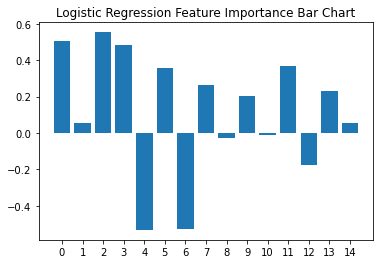

In [36]:
# plot feature importance
plt.bar([x for x in range(len(feature_imp))], feature_imp)
plt.xticks(np.arange(0,len(df2.columns)-1))
plt.title("Logistic Regression Feature Importance Bar Chart")
plt.show()

In [37]:
# create X & Y variables
X = df2.iloc[:,:-1].values
Y = df2[["target_5yrs"]].values

In [38]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.80,
                                                    random_state=46)

In [39]:
# create N & d lists and combined list with all combinations
N = list(range(1,31))
d = list(range(1,11))

# put error rates for all combinations into a df
error_rates = []
data = []

for i in N:
    for j in d:
        RFC = RandomForestClassifier(n_estimators=i, max_depth=j, criterion ='entropy', random_state=46)
        RFC.fit(X_train, Y_train.ravel())
        Y_pred = RFC.predict(X_test)
        error_rate = np.mean(Y_pred!=Y_test)  
        error_rates.append(error_rate)
        data.append([i,j,error_rate])

In [40]:
# create dataframe object
my_df = pd.DataFrame(columns=["N", "error_rate", "d"])
N_list = [item[0] for item in data]
d_list = [item[1] for item in data]
error_rate_list = [item[2] for item in data]
my_df["N"] = N_list
my_df["d"] = d_list
my_df["error_rate"] = error_rate_list

In [41]:
# get best N & d value for RFC
error_min = my_df["error_rate"].min()
finder = my_df.loc[my_df["error_rate"] == error_min]
best_n_d = [int(finder.iloc[0]["N"]), int(finder.iloc[0]["d"])]
print("The best N, d combo is:", best_n_d)

The best N, d combo is: [9, 1]


In [42]:
# create model based on best N & d combination
RFC = RandomForestClassifier(n_estimators=best_n_d[0], \
    max_depth=best_n_d[1], criterion ='entropy')
RFC.fit(X_train, Y_train.ravel())
Y_pred = RFC.predict(X_test)

# calculate best accuracy value
RFC_accuracy = accuracy_score(Y_test, Y_pred)
print("The accuracy for the best combination of N and d is:", \
"%.4f" % RFC_accuracy)

The accuracy for the best combination of N and d is: 0.7008


In [43]:
# create and display confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nBest N & d confusion matrix printout:\n",conf_matrix)


Best N & d confusion matrix printout:
 [[191 190]
 [120 535]]


In [44]:
# print RMSE value
RFC_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', 
"%.4f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.5470


In [45]:
# create a confusion matrix based on best N & d combination
conf_matrix = confusion_matrix(Y_test, Y_pred)

# assign variables
RFC_TP = conf_matrix[1][1]
RFC_FN = conf_matrix[0][1]
RFC_TN = conf_matrix[0][0]
RFC_FP = conf_matrix[1][0]

# get true pos/neg values
RFC_TPR = round(RFC_TP/(RFC_TP + RFC_FN),4)
RFC_TNR = round(RFC_TN/(RFC_TN + RFC_FP),4)

In [46]:
# XGBoost create X & Y variables on encoded data
X = df2.iloc[:,:-1].values
Y = df2[["target_5yrs"]].values

In [47]:
# scale X
X = scaler.fit_transform(X)

In [48]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.80,
                                                    random_state=46)

In [49]:
# fit model no training data
XGB = XGBClassifier(n_estimators=100, max_depth=3, random_state=46, \
    min_child_weight=0.5, gamma=0.1, booster="gbtree", learning_rate=0.01,\
    subsample=1, objective='binary:logistic', n_jobs=4,use_label_encoder=False)
XGB.fit(X_train, Y_train.ravel())

[16:44:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=0.5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=46,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [50]:
# make predictions for test data
Y_pred = XGB.predict(X_test)

In [51]:
# evaluate predictions
XG_accuracy = accuracy_score(Y_test, Y_pred)
print("The XGBoost Accuracy is:", "%.4f" % XG_accuracy)

The XGBoost Accuracy is: 0.7181


In [52]:
# create a confusion matrix based on best N & d combination
conf_matrix = confusion_matrix(Y_test, Y_pred)

# assign variables
XG_TP = conf_matrix[1][1]
XG_FN = conf_matrix[0][1]
XG_TN = conf_matrix[0][0]
XG_FP = conf_matrix[1][0]

# get true pos/neg values
XG_TPR = round(XG_TP/(XG_TP + XG_FN),4)
XG_TNR = round(XG_TN/(XG_TN + XG_FP),4)

In [53]:
# print RMSE value
XGB_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('XGBoost Root Mean Squared Error:', 
"%.4f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost Root Mean Squared Error: 0.5309


In [54]:
# try NB classifier supervised model
NB_classifier = GaussianNB().fit(X_train, Y_train.ravel())
Y_pred = NB_classifier.predict(X_test)

# reshape test & prediction data
Y_test = Y_test.reshape(-1,1)
Y_pred = Y_pred.reshape(-1,1)

In [55]:
# split data into train & test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80, random_state=46)

# create NB classifier object, train and get metrics
NB_classifier = GaussianNB().fit(X_train, Y_train.ravel())
Y_pred = NB_classifier.predict(X_test)
NB_accuracy = accuracy_score(Y_test, Y_pred)

# print accuracy value
print("The accuracy using NB is:", "%.4f" % NB_accuracy)

The accuracy using NB is: 0.6245


In [56]:
# create a confusion matrix based on best N & d combination
conf_matrix = confusion_matrix(Y_test, Y_pred)

# assign variables
NB_TP = conf_matrix[1][1]
NB_FN = conf_matrix[0][1]
NB_TN = conf_matrix[0][0]
NB_FP = conf_matrix[1][0]

# get true pos/neg values
NB_TPR = NB_TP/(NB_TP + NB_FN)
NB_TNR = NB_TN/(NB_TN + NB_FP)

In [57]:
# print RMSE value
NB_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('Naive-Bayes Root Mean Squared Error:', 
"%.4f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Naive-Bayes Root Mean Squared Error: 0.6128


In [58]:
# summarize the results of all of the models' performance
my_table = PrettyTable(["Model", "TP", "FP", "TN","FN", "accuracy","TPR","TNR"])
my_table.add_row(["Logistic Regression 1", LR1_TP, LR1_FP, LR1_TN,\
    LR1_FN, "%.4f" % LR1_accuracy, "%.4f" % LR1_TPR, "%.4f" % LR1_TNR])
my_table.add_row(["Logistic Regression 2", LR2_TP, LR2_FP, LR2_TN,\
    LR2_FN, "%.4f" % LR2_accuracy, "%.4f" % LR2_TPR, "%.4f" % LR2_TNR])
my_table.add_row(["Random Forest", RFC_TP, RFC_FP, RFC_TN, RFC_FN,\
    "%.4f" % RFC_accuracy, "%.4f" % RFC_TPR, "%.4f" % RFC_TNR])
my_table.add_row(["XGBoost", XG_TP, XG_FP, XG_TN, XG_FN,\
    "%.4f" % XG_accuracy, "%.4f" % XG_TPR, "%.4f" % XG_TNR])
my_table.add_row(["Naive-Bayes", NB_TP, NB_FP, NB_TN, NB_FN,\
    "%.4f" % NB_accuracy, "%.4f" % NB_TPR, "%.4f" % NB_TNR])
print("------------ Summary Table ------------ \n", my_table)

------------ Summary Table ------------ 
 +-----------------------+-----+-----+-----+-----+----------+--------+--------+
|         Model         |  TP |  FP |  TN |  FN | accuracy |  TPR   |  TNR   |
+-----------------------+-----+-----+-----+-----+----------+--------+--------+
| Logistic Regression 1 | 523 | 132 | 225 | 156 |  0.7220  | 0.7703 | 0.6303 |
| Logistic Regression 2 | 516 | 139 | 232 | 149 |  0.7220  | 0.7759 | 0.6253 |
|     Random Forest     | 535 | 120 | 191 | 190 |  0.7008  | 0.7379 | 0.6141 |
|        XGBoost        | 516 | 139 | 228 | 153 |  0.7181  | 0.7713 | 0.6213 |
|      Naive-Bayes      | 337 | 318 | 310 |  71 |  0.6245  | 0.8260 | 0.4936 |
+-----------------------+-----+-----+-----+-----+----------+--------+--------+


In [59]:
# create RMSE table
my_table = PrettyTable(["Model", "RMSE"])
my_table.add_row(["Logistic Regression 1", "%.4f" % LR1_RMSE])
my_table.add_row(["Logistic Regression 2", "%.4f" % LR2_RMSE])
my_table.add_row(["Random Forest", "%.4f" % RFC_RMSE])
my_table.add_row(["XGBoost", "%.4f" % XGB_RMSE])
my_table.add_row(["Naive-Bayes", "%.4f" % NB_RMSE])
print("----------- RMSE Table ----------- \n", my_table)

----------- RMSE Table ----------- 
 +-----------------------+--------+
|         Model         |  RMSE  |
+-----------------------+--------+
| Logistic Regression 1 | 0.5272 |
| Logistic Regression 2 | 0.5272 |
|     Random Forest     | 0.5470 |
|        XGBoost        | 0.5309 |
|      Naive-Bayes      | 0.6128 |
+-----------------------+--------+


In [60]:
# select best model based on accuracy
accuracies = [LR1_accuracy, LR2_accuracy, RFC_accuracy, XG_accuracy, NB_accuracy]
print("The highest accuracy of the models is:", "%.4f" % max(accuracies))

The highest accuracy of the models is: 0.7220


In [61]:
# Use the LR2 model to predict unseen data outcomes
# create X & Y variables
X = df2.iloc[:,:-1].values
Y = df2[["target_5yrs"]].values

In [62]:
# create scaler object
scaler = StandardScaler()

In [63]:
# scale X
X = scaler.fit_transform(X)

In [64]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.80,
                                                    random_state=46)

In [65]:
# read in unseen NBA rookies data
rookies_df = pd.read_csv("nba_rookies.csv")

In [66]:
# remove unneeded columns
rookies_df_clean = rookies_df.iloc[:,3:]

In [67]:
# check values for new unseen data df
rookies_df_clean.head()

,gp,min,pts,fgm,fga,3p_made,3pa,ftm,fta,oreb,dreb,ast,stl,blk,tov
0,64,32.6,17.4,6.7,16.1,1.8,5.7,2.2,2.6,0.9,4.6,5.6,1.2,0.7,3.7
1,67,31.9,17.3,6.1,14.2,2.3,6.8,2.8,3.5,0.5,2.9,2.6,0.7,0.3,2.0
2,74,35.4,15.3,6.2,12.6,0.8,2.6,2.1,2.9,2.6,4.9,3.5,1.1,0.7,1.8
3,79,30.7,15.2,5.8,12.3,1.2,3.4,2.4,2.8,1.1,3.4,2.9,0.9,0.4,1.5
4,69,33.8,15.0,6.1,12.0,0.3,1.3,2.4,3.7,2.1,6.2,2.5,0.8,1.7,1.9


In [68]:
# check tail
rookies_df_clean.tail()

,gp,min,pts,fgm,fga,3p_made,3pa,ftm,fta,oreb,dreb,ast,stl,blk,tov
95,12,10.7,1.1,0.4,1.8,0.1,0.3,0.2,0.4,0.8,1.2,0.6,0.4,0.2,0.2
96,12,5.9,1.1,0.4,1.3,0.2,0.8,0.0,0.2,0.4,0.6,0.1,0.1,0.3,0.1
97,13,2.9,1.1,0.4,1.2,0.1,0.6,0.2,0.3,0.5,0.5,0.2,0.1,0.1,0.3
98,14,4.5,1.1,0.4,1.3,0.0,0.1,0.2,0.3,0.2,0.3,0.9,0.1,0.0,0.2
99,21,3.0,1.0,0.4,0.7,0.0,0.1,0.1,0.4,0.1,0.4,0.2,0.0,0.1,0.3


In [69]:
# predict target_5yrs using model
R_X = rookies_df_clean.iloc[:,:].values

In [70]:
# predict rookie 5 year outcomes with worst performing model
Rookie_Pred_NB = NB_classifier.predict(R_X)

In [71]:
# take predictions and add back to rookies_df as a column
Rookie_Pred_Vals = list(Rookie_Pred_NB)
rookies_df["5_yr_prediction_NB"] = Rookie_Pred_Vals
# check value counts of prediction
print("Using Worst Performing Model, Naive-Bayes: \n")
print("The size of the rookie class list is:", len(rookies_df))
print("The number of rookies who will play 5+ years is:",
sum(rookies_df["5_yr_prediction_NB"]==1))
print("The number of rookies who will not play 5+ years is:",
sum(rookies_df["5_yr_prediction_NB"]==0))

Using Worst Performing Model, Naive-Bayes: 

The size of the rookie class list is: 100
The number of rookies who will play 5+ years is: 69
The number of rookies who will not play 5+ years is: 31


In [72]:
# create logistic regression classifier
log_reg_classifier = LogisticRegression(penalty = 'l2', C = 1, 
    solver='newton-cg' ,random_state=46)
log_reg_classifier.fit(X_train, Y_train.ravel())
Y_pred = log_reg_classifier.predict(X_test)

In [73]:
# predict rookie 5 year outcomes with best performing model
Rookie_Pred_LR = log_reg_classifier.predict(R_X)

In [74]:
# take predictions and add back to rookies_df as a column
Rookie_Pred_Vals = list(Rookie_Pred_LR)
rookies_df["5_yr_prediction_LR"] = Rookie_Pred_Vals
# check value counts of prediction
print("Using Best Performing Model, Logistic Regression: \n")
print("The size of the rookie class list is:", len(rookies_df))
print("The number of rookies who will play 5+ years is:",
sum(rookies_df["5_yr_prediction_LR"]==1))
print("The number of rookies who will not play 5+ years is:",
sum(rookies_df["5_yr_prediction_LR"]==0))

Using Best Performing Model, Logistic Regression: 

The size of the rookie class list is: 100
The number of rookies who will play 5+ years is: 99
The number of rookies who will not play 5+ years is: 1


In [75]:
# create export of rookies dfs
rookies_df.to_csv("rookies_df_predictions.csv", index=False)
print("The updated Rookies CSV file has been created!")

The updated Rookies CSV file has been created!
